# Abaixo temos a explicação das variáveis que serão utilizadas no banco de dados e como elas estão divididas.

age - idade dos pacientes

gender - genero (2 mulheres) (1 homens)

height - altura dos pacientes

weight - peso dos pacientes

gluc - glicose normal (1) alta (2) muito alta (3)

cholesterol - normal (1) alta (2) muito alta(3)

smoke - fumante (1) não fumante (0)

alco - consume alcool (1) não consome (0)

active - realiza atividades fisicas (1) não realiza (0)

cardio_disease - tem doença cardio (1) não tem (0) - Variável target

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.compose import ColumnTransformer

In [3]:
base = pd.read_csv("CARDIO_BASE.csv", delimiter=';')

In [4]:
base

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
0,50,2,168,62,1,1,0,0,1,0
1,55,1,156,85,3,1,0,0,1,1
2,52,1,165,64,3,1,0,0,0,1
3,48,2,169,82,1,1,0,0,1,1
4,48,1,156,56,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,56,1,166,65,1,1,0,0,0,0
9996,50,1,160,93,2,1,0,0,1,1
9997,40,1,158,66,2,2,0,0,1,0
9998,50,1,168,70,3,1,0,0,1,1


Abaixo realizaremos o tratamento dos dados e possíveis relações entre as variáveis. 

In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   gender          10000 non-null  int64 
 2   height          10000 non-null  int64 
 3   weight          10000 non-null  object
 4   cholesterol     10000 non-null  int64 
 5   gluc            10000 non-null  int64 
 6   smoke           10000 non-null  int64 
 7   alco            10000 non-null  int64 
 8   active          10000 non-null  int64 
 9   cardio_disease  10000 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 781.4+ KB


In [6]:
base['weight'] = base['weight'].astype(str).str.replace(',', '.').astype(float)

In [7]:
base.describe()

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.288300,1.345400,164.308200,74.303710,1.365000,1.222200,0.089000,0.053700,0.797200,0.503100
std,6.796234,0.475522,8.178796,14.566353,0.677658,0.565561,0.284758,0.225436,0.402105,0.500015
min,30.000000,1.000000,70.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,2.000000,170.000000,82.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Já podemos ver algumas inconsistências nos dados: 

1 - Uma pessoa com altura 70cm sendo que a idade mínima é de 30 anos

2 - Uma pessoa com altura 250cm o que também é praticamente impossível accontecer. 

Abaixo vamos realizar alguns boxplots de altura e peso e vamos filtrar o que é necessário.

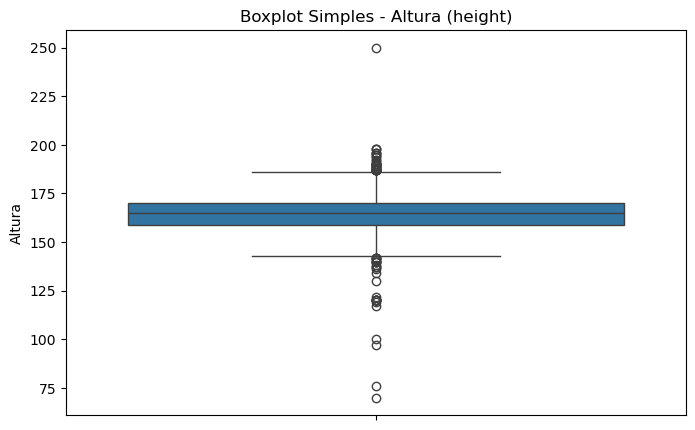

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=base['height'])
plt.title('Boxplot Simples - Altura (height)')
plt.ylabel('Altura')
plt.show()

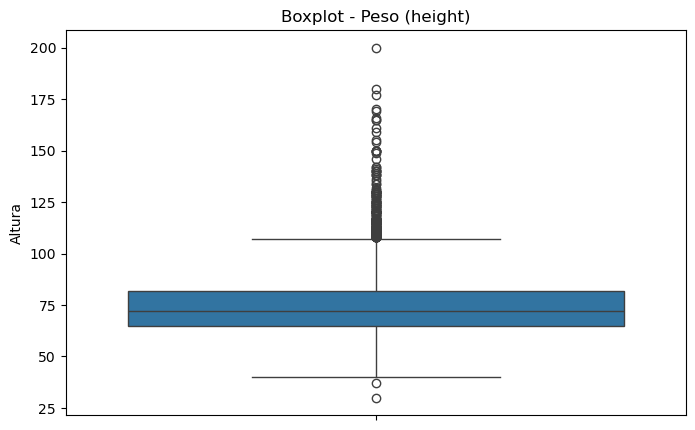

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=base['weight'])
plt.title('Boxplot - Peso (height)')
plt.ylabel('Altura')
plt.show()

In [10]:
# Identificar outliers usando método IQR
Q1 = base['height'].quantile(0.25)
Q3 = base['height'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = base[(base['height'] < limite_inferior) | (base['height'] > limite_superior)]

print(f"Total de registros: {len(base)}")
print(f"Número de outliers na altura: {len(outliers)}")
print(f"Limite inferior: {limite_inferior:.1f}")
print(f"Limite superior: {limite_superior:.1f}")

Total de registros: 10000
Número de outliers na altura: 74
Limite inferior: 142.5
Limite superior: 186.5


In [11]:
# Identificar outliers usando método IQR
Q1 = base['weight'].quantile(0.25)
Q3 = base['weight'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = base[(base['weight'] < limite_inferior) | (base['weight'] > limite_superior)]

print(f"Total de registros: {len(base)}")
print(f"Número de outliers no peso: {len(outliers)}")
print(f"Limite inferior: {limite_inferior:.1f}")
print(f"Limite superior: {limite_superior:.1f}")

Total de registros: 10000
Número de outliers no peso: 247
Limite inferior: 39.5
Limite superior: 107.5


Apesar de outliers terem sido encontrados, podemos presumir que uma pessoa de 2 metros existe e não seria ideal excluí-la apenas porque é consideravelmente mais alta que a média das pessoas, assim como pessoas obesas podem ter mais de 105 quilos. Considerando que podemos ter pessoas com nanismo no banco de dados e a média de altura de um anão é 1.20, vamos considerar alturas acima de 1.10 para dar uma margem e abaixo de 2.10. Além disso, vamos considerar pesos apenas acima de 45 quilos já que estamos tratando de pessoas com 30 anos ou mais.

In [12]:
base = base[
    (base['height'] >= 110) &
    (base['height'] <= 210) &
    (base['weight'] >= 45) 
]
# Ver tamanho depois
print("Depois:", base.shape)

Depois: (9962, 10)


Por si só alturas e pesos isolados não são variáveis boas de serem  trabalhadas, devido a isso, vamos calcular o IMC do banco de dados e excluir o que 
não acontece na prática, isto é, IMC abaixo de 10 e IMC acima de 60.

In [14]:
base = base.copy()
base['imc'] = base['weight'] / ((base['height'] / 100) ** 2)
suspeitos_imc = base[(base['imc'] < 10) | (base['imc'] > 60)]
print(f"Registros com IMC extremo (<10 ou >60): {len(suspeitos_imc)}")

Registros com IMC extremo (<10 ou >60): 6


In [15]:
base = base[~base.index.isin(suspeitos_imc.index)]

In [16]:
base.drop('weight', axis=1, inplace=True)
base.drop('height', axis=1, inplace=True)

Vamos olhar agora para a relação entre pessoas que fumam e pessoas que possuem doença cardíaca.

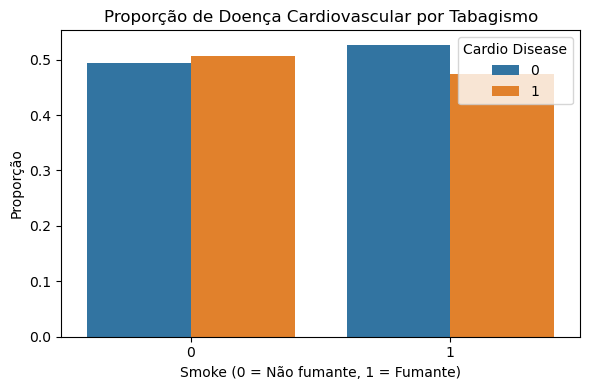

In [17]:
prop_smoke = (
    pd.crosstab(base['smoke'], base['cardio_disease'], normalize='index')
      .reset_index()
      .melt(id_vars='smoke', var_name='cardio_disease', value_name='proportion')
)

plt.figure(figsize=(6,4))
sns.barplot(
    data=prop_smoke,
    x='smoke',
    y='proportion',
    hue='cardio_disease'
)

plt.xlabel('Smoke (0 = Não fumante, 1 = Fumante)')
plt.ylabel('Proporção')
plt.title('Proporção de Doença Cardiovascular por Tabagismo')
plt.legend(title='Cardio Disease')
plt.tight_layout()
plt.show()

In [18]:
dist_fumo = base['smoke'].value_counts(normalize=True)
print(f"\nDistribuição de fumantes:")
print(f"Não fumantes (0): {dist_fumo[0]*100:.1f}%")
print(f"Fumantes (1): {dist_fumo[1]*100:.1f}%")

glicose = base['gluc'].value_counts(normalize=True)
print(f"\nDistribuição dos valores de glicose:")
print(f"glicose normal (0): {glicose[1]*100:.1f}%")
print(f"glicose alta (1): {glicose[2]*100:.1f}%")
print(f"glicose muito alta (2): {glicose[3]*100:.1f}%")

dist_alcool = base['alco'].value_counts(normalize=True)
print(f"\nDistribuição de pessoas que consomem alcool:")
print(f"Não Ingerem Alcool (0): {dist_fumo[0]*100:.1f}%")
print(f"Ingerem Alcool (1): {dist_fumo[1]*100:.1f}%")


Distribuição de fumantes:
Não fumantes (0): 91.1%
Fumantes (1): 8.9%

Distribuição dos valores de glicose:
glicose normal (0): 85.1%
glicose alta (1): 7.5%
glicose muito alta (2): 7.4%

Distribuição de pessoas que consomem alcool:
Não Ingerem Alcool (0): 91.1%
Ingerem Alcool (1): 8.9%


Para as pessoas não fumantes, indicadas pelo 0, temos mais pessoas que possuem alguma doença cardíaca, mesmo a quantidade sendo irrisória. O contrário acontece para pessoas fumantes, isto é, a maioria das pessoas fumantes não possuem doença cardíaca. Apesar do dado parecer contraditório, quando olhamos para o dataset, o conjunto de não fumantes é menos de 10% dos dados, além de que é imprescíndivel a informação de quanto tempo uma pessoa fuma também. Olhar para isso isoladamente como no dataset vai parecer que fumar não faz diferença para doenças no coração.

Agora olharemos para pessoas que possuem doença cardíaca e o nível de colesterol.

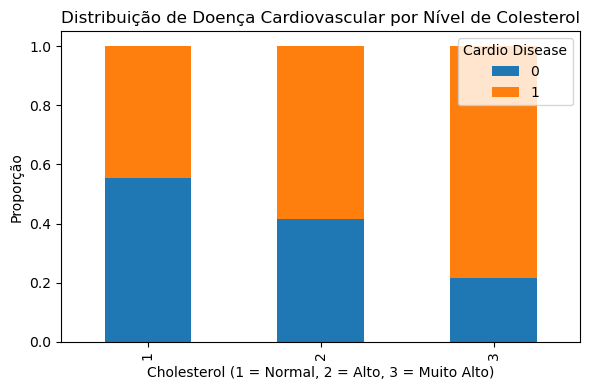

In [17]:
prop_chol = pd.crosstab(
    base['cholesterol'],
    base['cardio_disease'],
    normalize='index'
)

prop_chol.plot(
    kind='bar',
    stacked=True,
    figsize=(6,4)
)

plt.xlabel('Cholesterol (1 = Normal, 2 = Alto, 3 = Muito Alto)')
plt.ylabel('Proporção')
plt.title('Distribuição de Doença Cardiovascular por Nível de Colesterol')
plt.legend(title='Cardio Disease')
plt.tight_layout()
plt.show()

Aqui podemos ver a relação do colesterol com a doença no coração e neste caso, é evidente que quanto maior o colesterol, maior a proporção de doença cardíaca, vemos a taxa aumentando conforme o colesterol é considerado normal, alto ou muito alto. Esse é um fator determinante aqui.

In [18]:
base.corr()

,age,gender,cholesterol,gluc,smoke,alco,active,cardio_disease,imc
age,1.000000,-0.016730,0.172848,0.090920,-0.049596,-0.043752,-0.022012,0.237061,0.095624
gender,-0.016730,1.000000,-0.032546,-0.025646,0.332153,0.179862,0.011837,0.002508,-0.114108
cholesterol,0.172848,-0.032546,1.000000,0.431484,0.024474,0.019511,0.018945,0.221305,0.164875
gluc,0.090920,-0.025646,0.431484,1.000000,0.017564,0.013775,0.004773,0.082408,0.119842
smoke,-0.049596,0.332153,0.024474,0.017564,1.000000,0.329245,0.031804,-0.018526,-0.037007
alco,-0.043752,0.179862,0.019511,0.013775,0.329245,1.000000,0.037478,-0.006409,0.021251
active,-0.022012,0.011837,0.018945,0.004773,0.031804,0.037478,1.000000,-0.039331,-0.018336
cardio_disease,0.237061,0.002508,0.221305,0.082408,-0.018526,-0.006409,-0.039331,1.000000,0.194491
imc,0.095624,-0.114108,0.164875,0.119842,-0.037007,0.021251,-0.018336,0.194491,1.000000


Em geral temos na tabela correlações baixas. Na área de saúde isso realmente pode acontecer porque são problemas multifatoriais, mas analisando aqui as correlações que são maiores, temos:

Idade e Doença Cardíaca, isso conseguimos ver anteriormente na pergunta dois, a idade pode influenciar em ter uma doença cardíaca, claro que dependendo de fatores de consumo de alcool, atividade física etc.

Gênero e Fumo: isso pode indicar que homens tendem a fumar mais que mulheres.

Colesterol e Glicose - Uma das maiores correlações da lista e na verdade, se for analisar, esperaria até mais alta, uma vez que se a gordura ruim estiver alta, é normal que a glicose também esteja alta pelo consumo excessivo de gorduras.

Colesterol e Doença Cardíaca - Apesar do número de pessoas com colesterol alto não ser muito grande no banco de dados, podemos ver que isso infere na doença cardíaca sendo um dos maiores dados também de correlação presente.

Cigarro e Bebida alcólica - Temos uma certa correlação aqui também e isso pode indicar (precisaria investigar com mais estudos) que pessoas que tendem a fumar, também tendem a beber.

Importante destacar que não podemos inferir algo imediato a essas correlações uma vez que não são números tão elevados.

# Vamos separar agora nossa base de treino e teste para criar um modelo de regressão linear e depois compará-lo com um modelo de árvore.

Separando a variável target

In [19]:
X = base.drop('cardio_disease', axis=1) 
y = base['cardio_disease'] 

Verificando se as variáveis estão balanceadas:

In [20]:
base['cardio_disease'].value_counts()

cardio_disease
1    5015
0    4941
Name: count, dtype: int64

In [21]:
base['gender'] = base['gender'].map({1: 0, 2: 1})

Abaixo iremos separar os dados em treino e teste e separar as variáveis que são numéricas e as que são booleanas e depois criar nosso pipeline para treinar o modelo.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y 
)

In [23]:
num_features = ['age', 'imc', 'cholesterol', 'gluc']
bin_features = ['gender', 'smoke', 'alco', 'active']

In [24]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('bin', 'passthrough', bin_features)
    ]
)

In [28]:
model_regr = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', LogisticRegression(
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    ))
])

Aplicando regressão logística para o conjunto de treino:

In [29]:
model_regr.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'imc', 'cholesterol',
                                                   'gluc']),
                                                 ('bin', 'passthrough',
                                                  ['gender', 'smoke', 'alco',
                                                   'active'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [30]:
y_pred = model_regr.predict(X_test)
y_proba = model_regr.predict_proba(X_test)[:, 1]

In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))

Accuracy: 0.6460843373493976
ROC AUC: 0.6944943733007247
              precision    recall  f1-score   support

           0       0.64      0.67      0.65       989
           1       0.66      0.63      0.64      1003

    accuracy                           0.65      1992
   macro avg       0.65      0.65      0.65      1992
weighted avg       0.65      0.65      0.65      1992



Analisando as métricas acima, temos que:

Precision: Das pessoas que foram previstas como tendo doença cardíaca, 66% de fato possuiam a doença.

Recall: Das pessoas que possuiam doença cardíaca, o modelo peviu corretamente 63%.

Assim, para a classe 1 da nossa variável target, isto é, pessoas que possuem doença no coração, temos um f1-score relativamente baixo, de 0.63 e um AUC de 0.69, que é aceitável, ou seja, consegue fazer uma classificação modesta. Não é um cenário péssimo, mas não é um modelo ideal para prever se as pessoas possui a doença cardíaca ou não.

Abaixo criaremos uma modelo de árvore para compará-lo a regressão logística.

In [38]:
preprocess_tree = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('bin', 'passthrough', bin_features)
    ]
)

tree_model = Pipeline(steps=[
    ('preprocess', preprocess_tree),
    ('classifier', DecisionTreeClassifier(
        random_state=42,
        max_depth=5,
        min_samples_leaf=20
    ))
])

tree_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'imc', 'cholesterol',
                                                   'gluc']),
                                                 ('bin', 'passthrough',
                                                  ['gender', 'smoke', 'alco',
                                                   'active'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=20,
                                        random_state=42))])

In [39]:
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]
auc_tree = roc_auc_score(y_test, y_prob_tree)
print('AUC: ',auc_tree)
y_pred_tree = tree_model.predict(X_test)

print(classification_report(y_test, y_pred_tree))

AUC:  0.6832344221128321
              precision    recall  f1-score   support

           0       0.64      0.60      0.62       989
           1       0.63      0.66      0.64      1003

    accuracy                           0.63      1992
   macro avg       0.63      0.63      0.63      1992
weighted avg       0.63      0.63      0.63      1992



Não temos métricas significativamente distintas entre o modelo de regressão logística e o modelo de árvore. Com base nas variáveis disponíveis (demográficas, hábitos e exames pontuais), os modelos apresentaram desempenho moderado, sugerindo limitação na capacidade preditiva do dataset. A ausência de correlações fortes indica que fatores adicionais como histórico longitudinal, intensidade de exposição ou biomarcadores seriam necessários para melhorar a performance.

